<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Session 1)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the data set (Heart disease data)

The dataset contains information about patients. The aim is to find whether or not a patient has cardiovascular disease based on the several factors from the patient profile. <br> Attribute information: 

**male:** Gender of patient: male(1) or female(0) 

**age:** Age of patient

**education:** Education level of patient: 1 = Some High School; 2 = High School or GED; 3 = Some College or Vocational School; 4 = college

**currentSmoker:** Whether the patient is a smoker now: Yes(1) or No(0)

**cigsPerDay:** Average number of cigarettes smoked by patient per day

**BPMeds:** Whether the patient is on blood pressure medications: Yes(1) or No(0)

**prevalentStroke:** If the patient has a history of heart stroke: Yes(1) or No(0)

**prevalentHyp:** If the patient has a history of hypertension: Yes(1) or No(0)

**diabetes:**  If the patient has a diabetes: Yes(1) or No(0)

**totChol:** Average cholesterol levels in mg/dL

**sysBP:** Average systolic blood pressure of patient

**diaBP:** Average diastolic blood pressure of patient

**BMI:** BMI of patient

**heartRate:** Avergae heartrate of patient

**glucose:** Average blood glucose levels of patient

**CVD:** Does the patient have cardiovascular disease: Yes(1) or No(0)

## Table of Content

1. **[Logistic Regression Model](#logreg)**
2. **[Model Evaluation Metrics](#mod_eval)**
3. **[Performance Evaluation Metrics](#perf_eval)**
4. **[Determining optimal threshold](#opt)**

**Import the required libraries**

In [565]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_rows=None
pd.options.display.max_columns=None
from warnings import filterwarnings
filterwarnings('ignore')
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,recall_score,precision_score,f1_score,roc_curve,roc_auc_score,log_loss
pd.options.display.max_rows=None
pd.options.display.max_columns=None

#### Load the csv file

In [566]:
# load the csv file
df_heart = pd.read_csv("Heart_disease.csv")

# display the first two observations
df_heart.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,CVD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Prepare the data </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [567]:
df_heart.shape

(4240, 16)

In [568]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
male               4240 non-null int64
age                4240 non-null int64
education          4135 non-null float64
currentSmoker      4240 non-null int64
cigsPerDay         4211 non-null float64
BPMeds             4187 non-null float64
prevalentStroke    4240 non-null int64
prevalentHyp       4240 non-null int64
diabetes           4240 non-null int64
totChol            4190 non-null float64
sysBP              4240 non-null float64
diaBP              4240 non-null float64
BMI                4221 non-null float64
heartRate          4239 non-null float64
glucose            3852 non-null float64
CVD                4240 non-null int64
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [569]:
col=['male','education','currentSmoker','BPMeds','prevalentStroke','prevalentHyp','diabetes']

In [570]:
for i in col:
    df_heart[i]=df_heart[i].astype('object')

In [571]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
male               4240 non-null object
age                4240 non-null int64
education          4135 non-null object
currentSmoker      4240 non-null object
cigsPerDay         4211 non-null float64
BPMeds             4187 non-null object
prevalentStroke    4240 non-null object
prevalentHyp       4240 non-null object
diabetes           4240 non-null object
totChol            4190 non-null float64
sysBP              4240 non-null float64
diaBP              4240 non-null float64
BMI                4221 non-null float64
heartRate          4239 non-null float64
glucose            3852 non-null float64
CVD                4240 non-null int64
dtypes: float64(7), int64(2), object(7)
memory usage: 530.1+ KB


In [572]:
num_col=df_heart.select_dtypes(include='number')

In [573]:
cat_col=df_heart.select_dtypes(include='object')

In [574]:
num_col.columns,

(Index(['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate',
        'glucose', 'CVD'],
       dtype='object'),)

In [575]:
cat_col.columns

Index(['male', 'education', 'currentSmoker', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes'],
      dtype='object')

In [576]:
df_heart.describe()

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,CVD
count,4240.000000,4211.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,49.580189,9.005937,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,8.572942,11.922462,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,32.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,42.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,49.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,56.000000,20.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,70.000000,70.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [577]:
df_heart.describe(include='object')

,male,education,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes
count,4240,4135.0,4240,4187.0,4240,4240,4240
unique,2,4.0,2,2.0,2,2,2
top,0,1.0,0,0.0,0,0,0
freq,2420,1720.0,2145,4063.0,4215,2923,4131


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Perform an analysis for missing values </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [578]:
miss=pd.DataFrame()

In [579]:
miss['Number of Missing Values']=df_heart.isnull().sum()

In [580]:
miss['Percentage of Missing Values']=(df_heart.isnull().sum()/df_heart.shape[0])*100

In [581]:
miss

,Number of Missing Values,Percentage of Missing Values
male,0,0.000000
age,0,0.000000
education,105,2.476415
currentSmoker,0,0.000000
cigsPerDay,29,0.683962
BPMeds,53,1.250000
prevalentStroke,0,0.000000
prevalentHyp,0,0.000000
diabetes,0,0.000000
totChol,50,1.179245


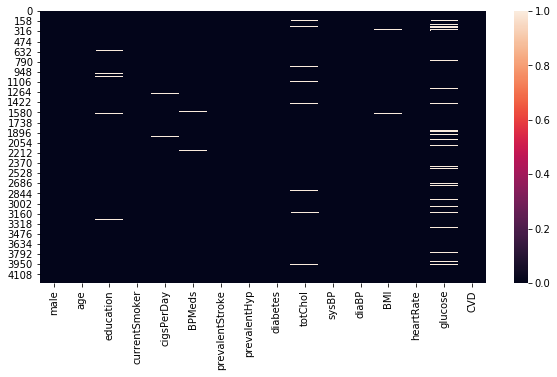

In [582]:
plt.figure(figsize=(10,5))
sns.heatmap(df_heart.isnull())

In [583]:
col=['education','BPMeds']

In [584]:
df_heart['education'].value_counts()

1.0    1720
2.0    1253
3.0     689
4.0     473
Name: education, dtype: int64

In [585]:
df_heart['BPMeds'].value_counts()

0.0    4063
1.0     124
Name: BPMeds, dtype: int64

In [586]:
df_heart['education'].replace(np.NaN,'1',inplace=True)

In [587]:
df_heart['BPMeds'].replace(np.NaN,'0',inplace=True)

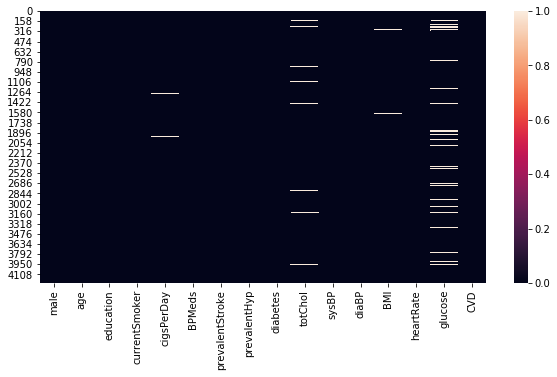

In [588]:
plt.figure(figsize=(10,5))
sns.heatmap(df_heart.isnull())

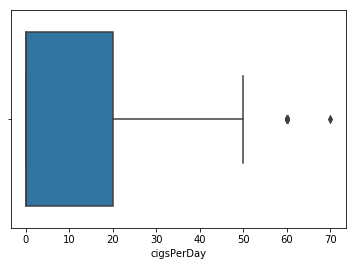

In [589]:
sns.boxplot(x=df_heart['cigsPerDay'])

In [590]:
df_heart['cigsPerDay'].replace(np.NaN,df_heart['cigsPerDay'].median(),inplace=True)

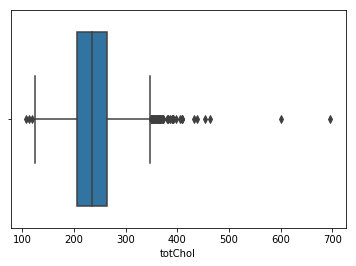

In [591]:
sns.boxplot(x=df_heart['totChol'])

In [592]:
df_heart['totChol'].replace(np.NaN,df_heart['totChol'].median(),inplace=True)

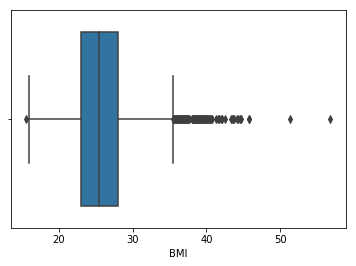

In [593]:
sns.boxplot(x=df_heart['BMI'])

In [594]:
df_heart['BMI'].replace(np.NaN,df_heart['BMI'].median(),inplace=True)

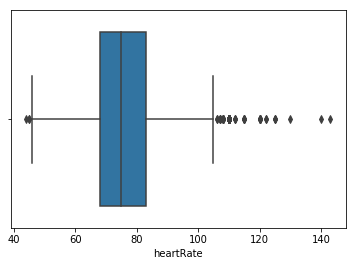

In [595]:
sns.boxplot(x=df_heart['heartRate'])

In [596]:
df_heart['heartRate'].replace(np.NaN,df_heart['heartRate'].median(),inplace=True)

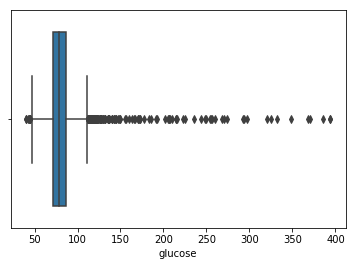

In [597]:
sns.boxplot(x=df_heart['glucose'])

In [598]:
df_heart['glucose'].replace(np.NaN,df_heart['glucose'].median(),inplace=True)

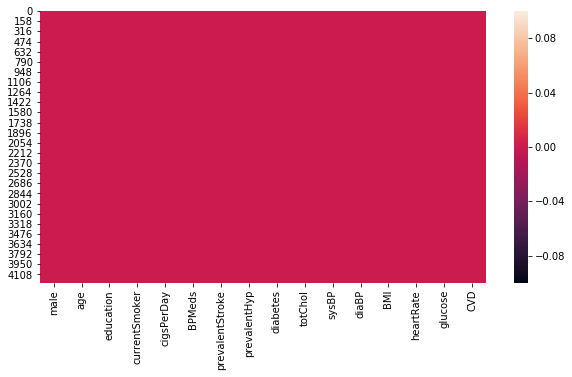

In [599]:
plt.figure(figsize=(10,5))
sns.heatmap(df_heart.isnull())

In [600]:
num_col=df_heart.select_dtypes(include='number')

### Outlier Treatment

In [601]:
num_col.shape

(4240, 9)

In [602]:
num_col=num_col.drop(['CVD'],axis=1)

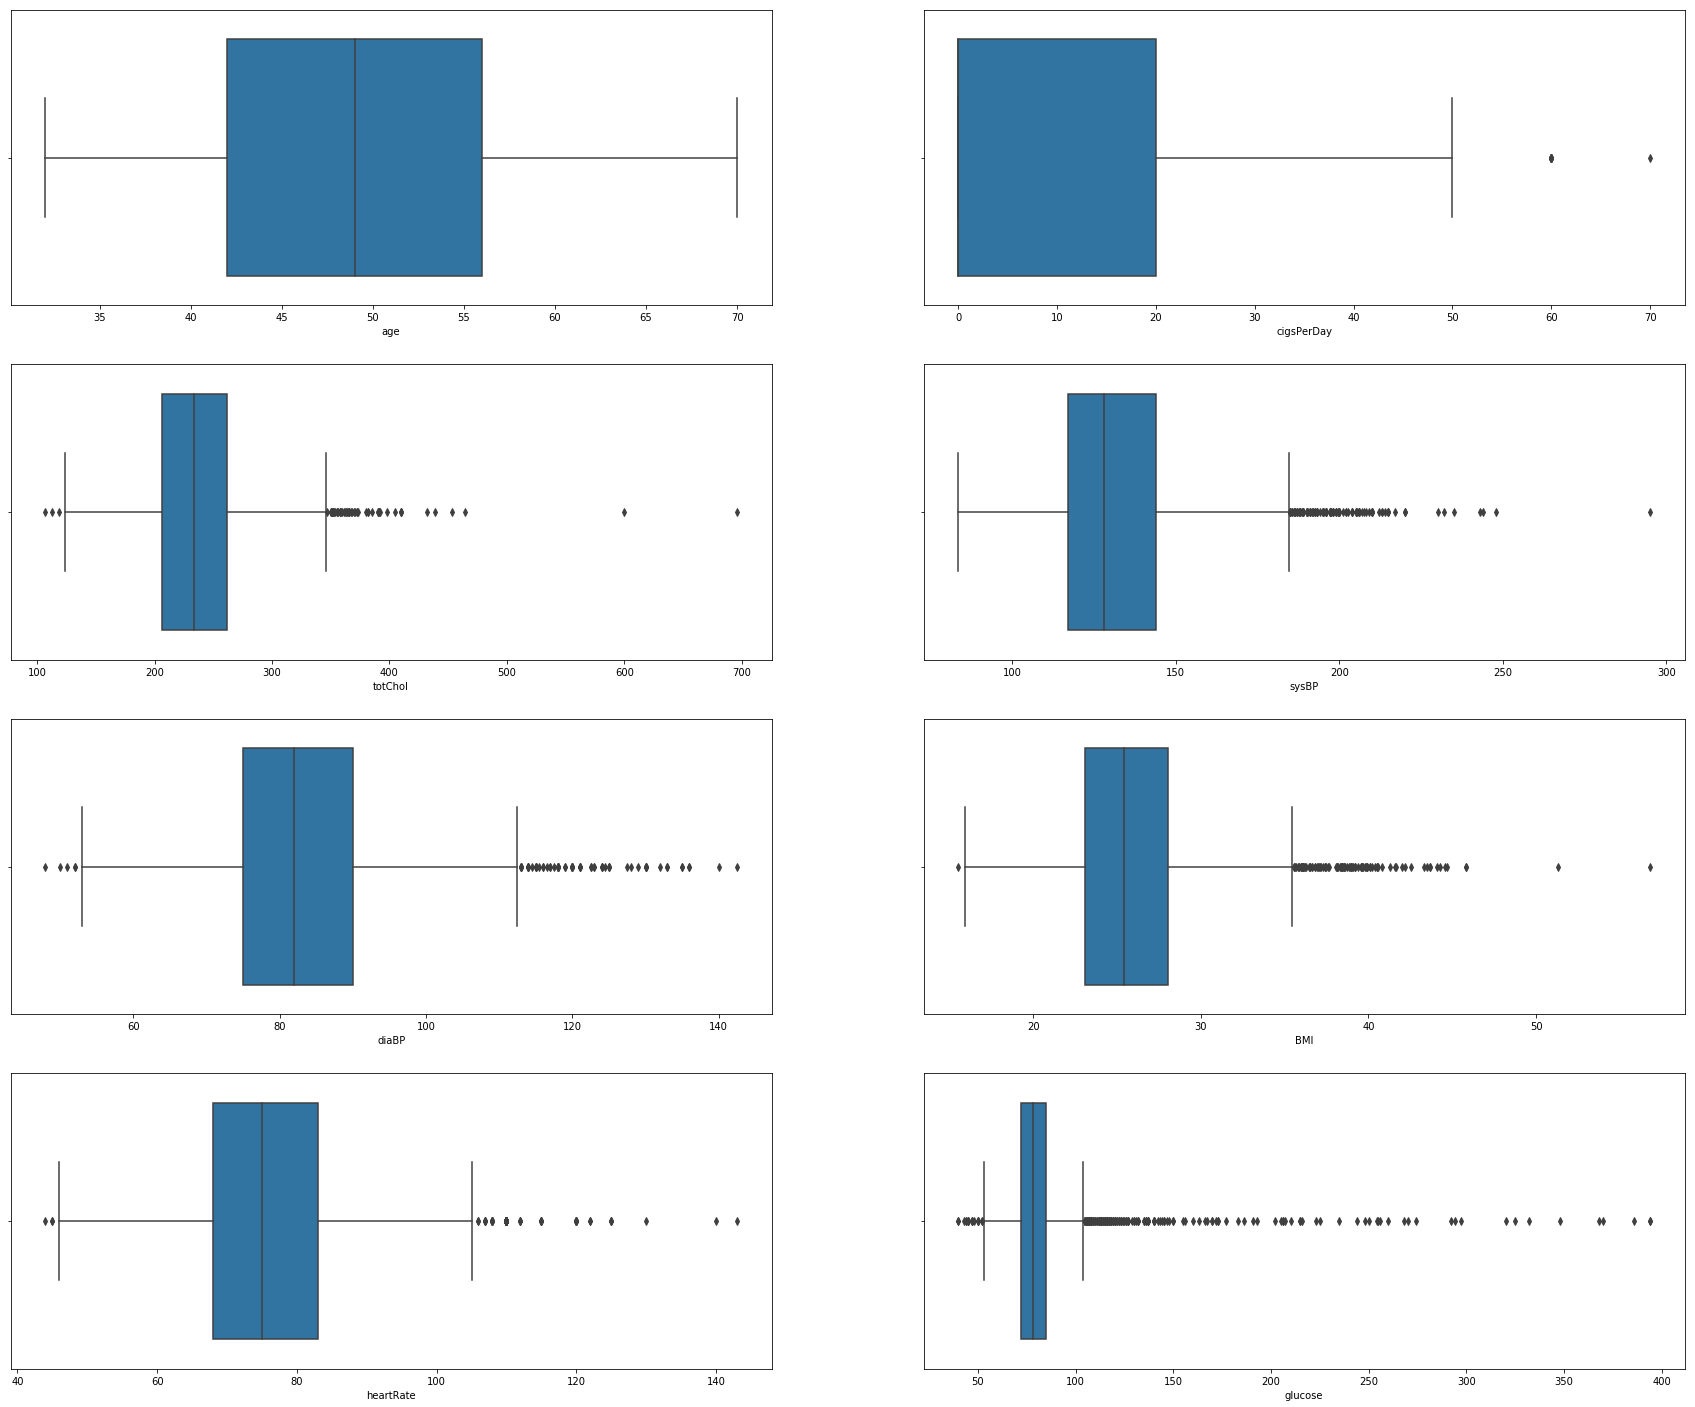

In [603]:
plt.figure(figsize=(30,25))
j=1
for column in num_col.columns:
    plt.subplot(4,2,j)
    sns.boxplot(x=num_col[column])
    j=j+1

In [604]:
num_col=num_col.drop(['age'],axis=1)

In [605]:
#Outlier Treatment
#Outlier Treatment
#Capping the outliers #Winsorization
for i in num_col.columns:
    q1=num_col[i].quantile(0.25)
    q3=num_col[i].quantile(0.75)
    iqr=q3-q1
    ub=q3 + 1.5*iqr
    lb=q1 - 1.5*iqr
    uc=num_col[i].quantile(0.99)
    lc=num_col[i].quantile(0.01)
    for ind1 in num_col[i].index:
        if num_col.loc[ind1, i] >ub:            
            num_col.loc[ind1, i] =uc
        if num_col.loc[ind1, i] < lb:
            num_col.loc[ind1, i] =lc

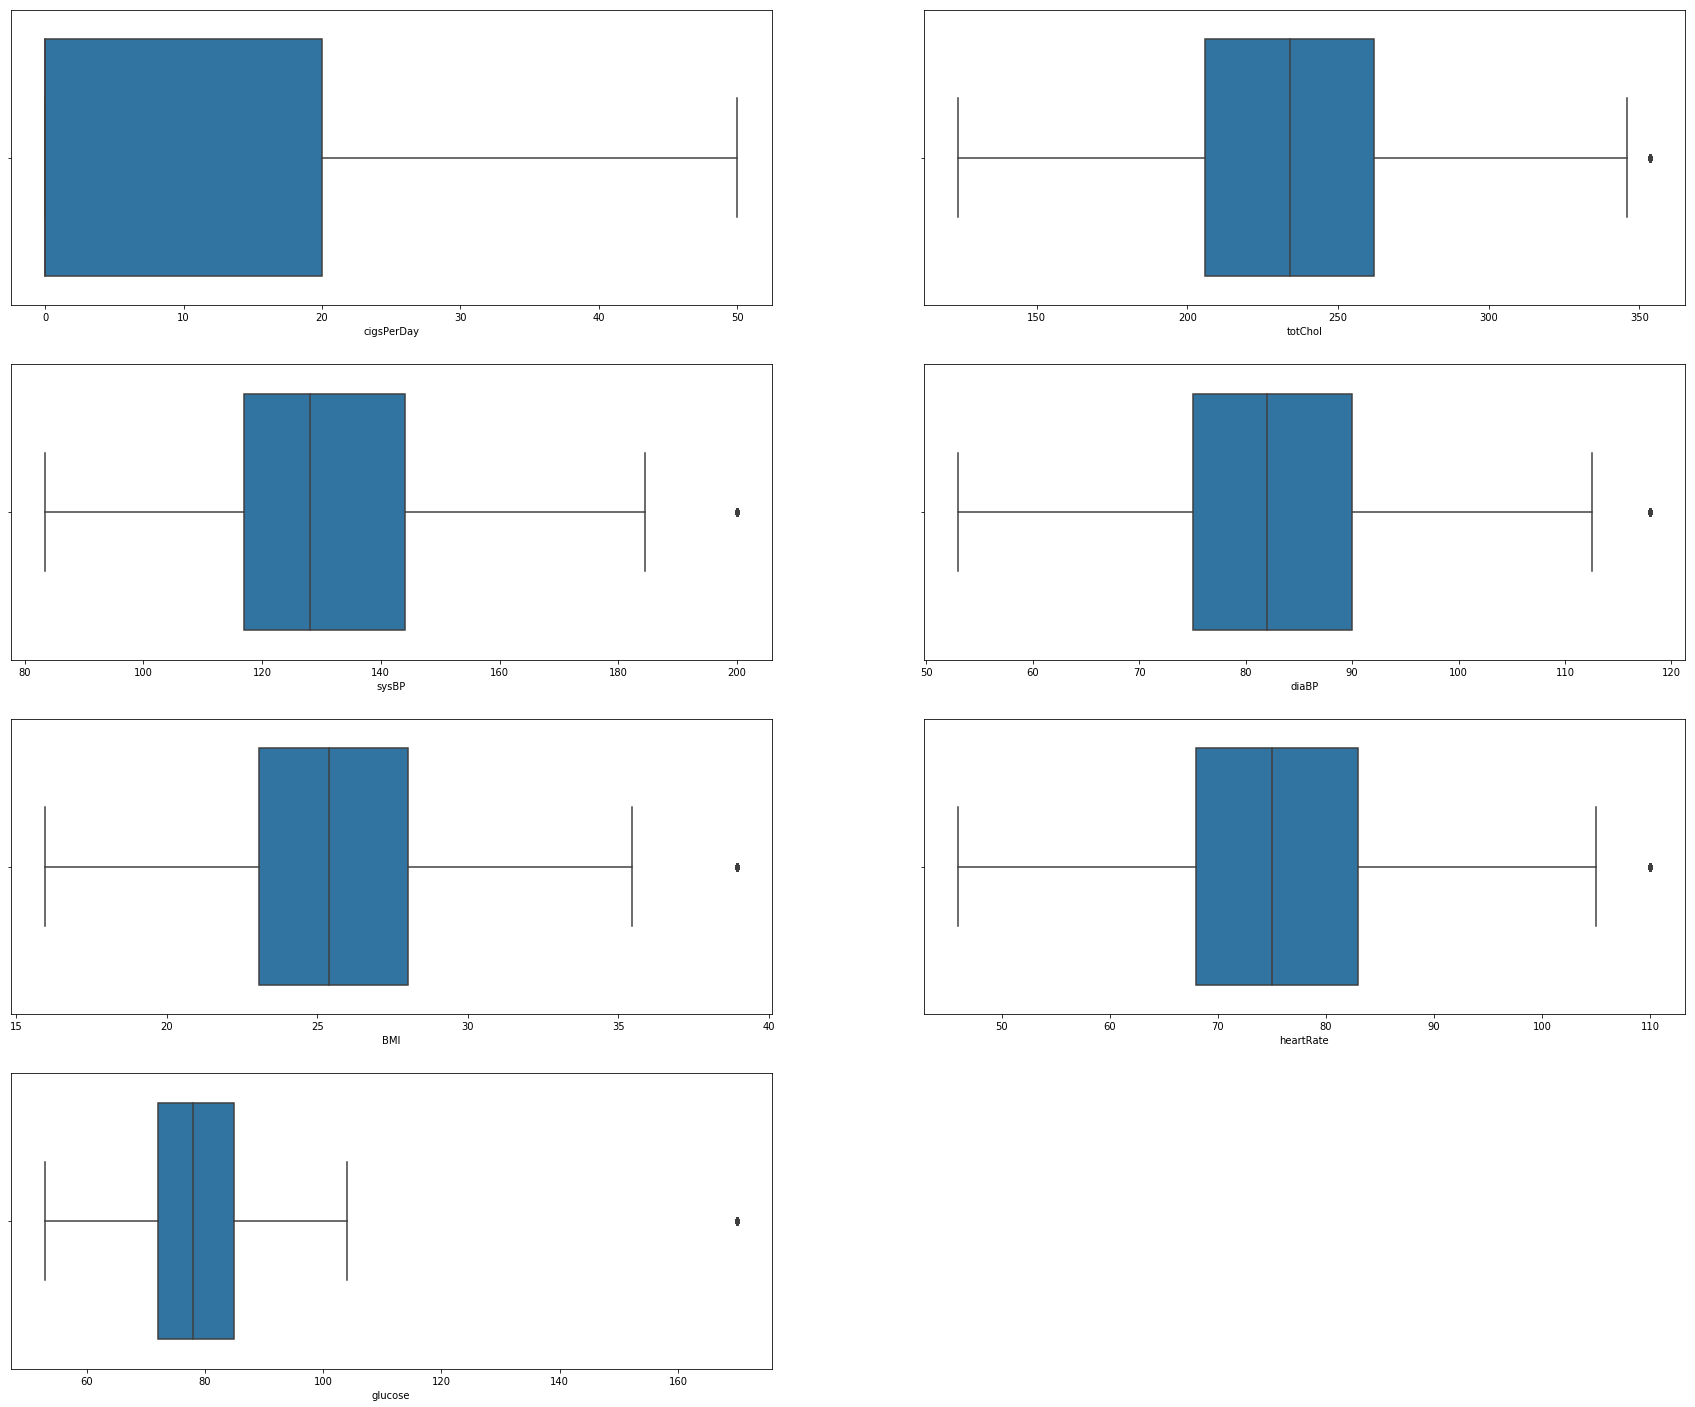

In [606]:
plt.figure(figsize=(30,25))
j=1
for column in num_col.columns:
    plt.subplot(4,2,j)
    sns.boxplot(x=num_col[column])
    j=j+1

In [607]:
   for column in num_col:
        df_heart[column]=num_col[column]

### Let's begin with some hands-on practice exercises

<a id="logreg"> </a>
## 1. Logistic regression model

## We shall use the heart disease dataset

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Are all the classes of target variable 'CVD' fairly represented by records in the considered dataset ?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [608]:
df_heart['CVD'].value_counts()

0    3596
1     644
Name: CVD, dtype: int64

<b>Interpretation: </b>No all the classes are not fairly represented. The data is imbalenced

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Predict whether or not a patient will have cardiovascular disease based on the information about blood pressure of the patient. Columns related to blood pressure are diaBP, sysBP and BPMeds.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [609]:
df_BP=df_heart[['diaBP','sysBP','BPMeds','CVD']]
df_BP.head()

,diaBP,sysBP,BPMeds,CVD
0,70.0,106.0,0,0
1,81.0,121.0,0,0
2,80.0,127.5,0,0
3,95.0,150.0,0,1
4,84.0,130.0,0,0


In [610]:
X=df_BP.drop(['CVD'],axis=1)
Y=df_BP['CVD']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=48)

In [611]:
model=LogisticRegression()

In [612]:
model.fit(x_train,y_train)
pred=model.predict(x_test)

In [613]:
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

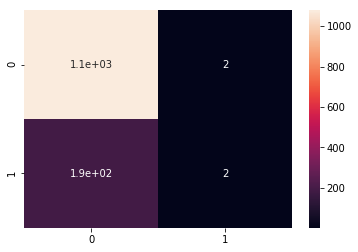

In [614]:
cm=confusion_matrix(y_test,pred)
sns.heatmap(cm,annot=True)

In [615]:
cm

array([[1078,    2],
       [ 190,    2]], dtype=int64)

In [616]:
y_test.value_counts()

0    1080
1     192
Name: CVD, dtype: int64

In [617]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.85      1.00      0.92      1080
          1       0.50      0.01      0.02       192

avg / total       0.80      0.85      0.78      1272



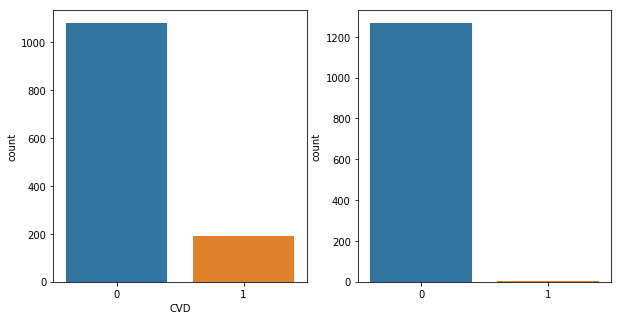

In [618]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(x=y_test)
plt.subplot(1,2,2)
sns.countplot(x=pred)

<b>Interpretation: </b> We can predict but its a bad model as it has false negative 

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Predict whether or not a patient has cardiovascular disease using the categorical variables in the dataset. How does a unit change in each feature influence the odds of a patient having a cardiocascular disease?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [619]:
df_cat=df_heart[cat_col.columns]
df_cat['CVD']=df_heart['CVD']
df_cat.head()

,male,education,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes,CVD
0,1,4,0,0,0,0,0,0
1,0,2,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0
3,0,3,1,0,0,1,0,1
4,0,3,1,0,0,0,0,0


In [620]:
X=df_cat.drop(['CVD'],axis=1)
Y=df_cat['CVD']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=48)

In [621]:
model1=LogisticRegression()
model1.fit(x_train,y_train)
pred=model1.predict(x_test)

In [622]:
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

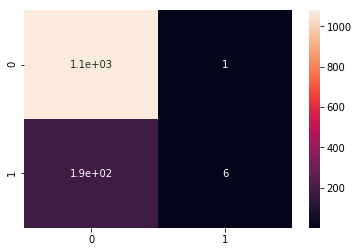

In [623]:
cm=confusion_matrix(y_test,pred)
sns.heatmap(cm,annot=True)

In [624]:
cm

array([[1079,    1],
       [ 186,    6]], dtype=int64)

In [625]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.85      1.00      0.92      1080
          1       0.86      0.03      0.06       192

avg / total       0.85      0.85      0.79      1272



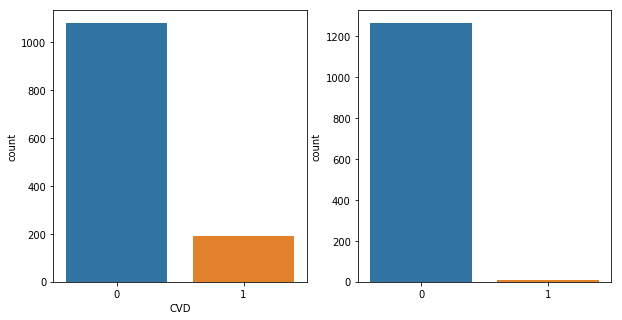

In [626]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(x=y_test)
plt.subplot(1,2,2)
sns.countplot(x=pred)

<b>Interpretation: </b> We can predict but its a bad model as it has false negative 

In [627]:
model1.coef_

array([[ 0.46127907, -0.18796784,  0.22042742,  0.47131417,  0.67305868,
         0.96495846,  0.91796811]])

* the odd of a patient having Cardio Vascular Disease in males is exp(0.46127907) times of females by keeping otehr inputs constant
* one unit increase in education will increse the odd odd of a patient having Cardio Vascular Disease by exp(-0.18796784) times by keeping otehr inputs constant
* the odd of a patient having Cardio Vascular Disease in Smokers is exp(0.22042742) times of Non Smokers by keeping otehr inputs constant
* the odd of a patient having Cardio Vascular Disease in people taking BPmeds is exp(0.47131417) times of people not taking BPMeds by keeping otehr inputs constant
* the odd of a patient having Cardio Vascular Disease in people having history of stroke is exp(0.67305868) times of people not having stroke by keeping otehr inputs constant
* the odd of a patient having Cardio Vascular Disease in people having history of hypertension is exp(0.96495846) times of people not having hypertension by keeping otehr inputs constant
* the odd of a patient having Cardio Vascular Disease in people having diabetes is exp(0.91796811) times of people not having diabetes by keeping otehr inputs constant


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Predit if a patient has cardiovascular disease based on whether or not the patient has history of hypertension. Calculate the odds ratio.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [628]:
df_hyp=pd.DataFrame()
df_hyp['prevalentHyp']=df_heart['prevalentHyp']
df_hyp['CVD']=df_heart['CVD']
df_hyp.head()

,prevalentHyp,CVD
0,0,0
1,0,0
2,0,0
3,1,1
4,0,0


In [629]:
df_hyp['prevalentHyp']=df_hyp['prevalentHyp'].astype('int64')

In [630]:
df_hyp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 2 columns):
prevalentHyp    4240 non-null int64
CVD             4240 non-null int64
dtypes: int64(2)
memory usage: 66.3 KB


In [631]:
X=df_hyp.drop(['CVD'],axis=1)
X=sm.add_constant(X)
Y=df_hyp['CVD']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=48)

In [632]:
model2=sm.Logit(y_train,x_train).fit()

Optimization terminated successfully.
         Current function value: 0.409151
         Iterations 6


In [633]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    CVD   No. Observations:                 2968
Model:                          Logit   Df Residuals:                     2966
Method:                           MLE   Df Model:                            1
Date:                Sat, 15 May 2021   Pseudo R-squ.:                 0.04104
Time:                        20:29:22   Log-Likelihood:                -1214.4
converged:                       True   LL-Null:                       -1266.3
                                        LLR p-value:                 2.075e-24
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -2.1325      0.072    -29.771      0.000      -2.273      -1.992
prevalentHyp     1.0701      0.104     10.259      0.000       0.866       1.275
================================================================================
"""

In [634]:
odds_ratio=np.exp(model2.params)

In [635]:
print(odds_ratio[1:,])

prevalentHyp    2.915764
dtype: float64


<a id="mod_eval"> </a>
## 2. Model Evaluation Metrics

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Build a full model to predict if a patient will have a cardiovascular disease. Find the value of Mcfadden's R<sup>2</sup>.
                </font>
            </div>
        </td>
    </tr>
</table>

In [636]:
data=df_heart.copy()

In [637]:
data['male']=data['male'].astype('int64')
data['education']=data['education'].astype('float64')
data['currentSmoker']=data['currentSmoker'].astype('int64')
data['BPMeds']=data['BPMeds'].astype('float64')
data['prevalentStroke']=data['prevalentStroke'].astype('int64')
data['prevalentHyp']=data['prevalentHyp'].astype('int64')
data['diabetes']=data['diabetes'].astype('int64')

In [638]:
X=data.drop(['CVD'],axis=1)
X=sm.add_constant(X)
Y=data['CVD']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=48)

In [639]:
model3=sm.Logit(y_train,x_train).fit()
model3.summary()

Optimization terminated successfully.
         Current function value: 0.375480
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    CVD   No. Observations:                 2968
Model:                          Logit   Df Residuals:                     2952
Method:                           MLE   Df Model:                           15
Date:                Sat, 15 May 2021   Pseudo R-squ.:                  0.1200
Time:                        20:29:24   Log-Likelihood:                -1114.4
converged:                       True   LL-Null:                       -1266.3
                                        LLR p-value:                 8.968e-56
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -7.6160      0.795     -9.577      0.000      -9.175      -6.057
male                0.4825      0.122      3.960      0.000       0.244       0.721
age                 0.0669      0.007      8.962      0.000       0.052       0.082
education          -0.0723      0.056     -1.296      0.195      -0.182       0.037
currentSmoker       0.0046      0.175      0.026      0.979      -0.339       0.348
cigsPerDay          0.0264      0.007      3.700      0.000       0.012       0.040
BPMeds              0.2469      0.249      0.991      0.322      -0.241       0.735
prevalentStroke     0.7632      0.502      1.520      0.128      -0.221       1.747
prevalentHyp        0.3791      0.154      2.458      0.014       0.077       0.681
diabetes            0.6245      0.305      2.047      0.041       0.027       1.222
totChol             0.0014      0.001      1.028      0.304      -0.001       0.004
sysBP               0.0129      0.004      3.105      0.002       0.005       0.021
diaBP              -0.0030      0.007     -0.425      0.671      -0.017       0.011
BMI                -0.0043      0.014     -0.299      0.765      -0.032       0.024
heartRate          -0.0007      0.005     -0.156      0.876      -0.010       0.008
glucose             0.0028      0.002      1.222      0.222      -0.002       0.007
===================================================================================
"""

McFadden's R^2 is 0.12

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Find the significant variables in the full model when all the variables are considered in prediction of whether or not a patient has cardiovascular disease.
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [640]:
pval=model3.pvalues

In [641]:
pval[pval<0.05].sort_values(ascending=True)

const           9.990776e-22
age             3.202252e-19
male            7.486393e-05
cigsPerDay      2.156175e-04
sysBP           1.903576e-03
prevalentHyp    1.396206e-02
diabetes        4.062668e-02
dtype: float64

age,male,cigsPerDay,sysBP,prevalentHyp are significant

In [643]:
X=data[['male', 'age', 'cigsPerDay', 'prevalentHyp', 'diabetes','sysBP']]
Y=data['CVD']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=48)

In [644]:
model4=LogisticRegression()
model4.fit(x_train,y_train)
pred=model4.predict(x_test)

In [645]:
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [646]:
cm=confusion_matrix(y_test,pred)

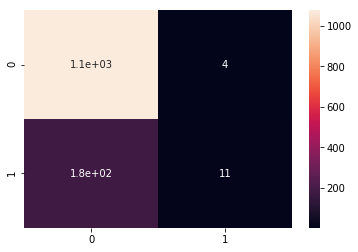

In [647]:
sns.heatmap(cm,annot=True)

In [648]:
cm

array([[1076,    4],
       [ 181,   11]], dtype=int64)

In [649]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.86      1.00      0.92      1080
          1       0.73      0.06      0.11       192

avg / total       0.84      0.85      0.80      1272



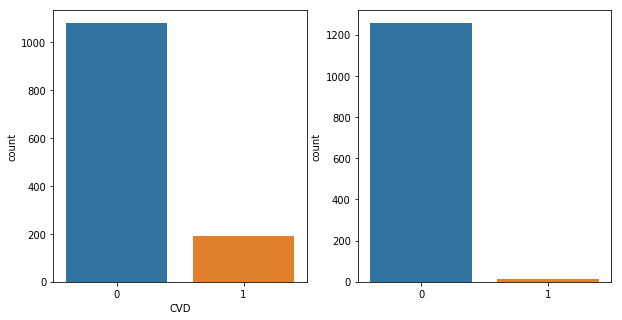

In [650]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(x=y_test)
plt.subplot(1,2,2)
sns.countplot(x=pred)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. How do the coefficients of each feature form the dataset impact the odds of a patient having a cardiovascular disease?
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [651]:
x_train.columns

Index(['male', 'age', 'cigsPerDay', 'prevalentHyp', 'diabetes', 'sysBP'], dtype='object')

In [652]:
model4.coef_

array([[0.38831861, 0.0580234 , 0.02279884, 0.58305827, 0.78229655,
        0.00642996]])

* the odd of a patient having Cardio Vascular Disease in males is exp(0.38831861) times of females by keeping otehr inputs constant
* one unit increase in age will increse the odd odd of a patient having Cardio Vascular Disease by exp(0.0580234) times by keeping otehr inputs constant
* one unit increase in CigsPerDay will increse the odd odd of a patient having Cardio Vascular Disease by exp(0.02279884) times by keeping otehr inputs constant
* the odd of a patient having Cardio Vascular Disease in people having history of hypertension is exp(0.58305827) times of people not having hypertension by keeping otehr inputs constant
* the odd of a patient having Cardio Vascular Disease in people having diabetes is exp(0.78229655) times of people not having diabetes by keeping otehr inputs constant
* one unit increase in sysBP will increse the odd odd of a patient having Cardio Vascular Disease by exp(0.00642996) times by keeping otehr inputs constant

<a id="perf_eval"> </a>
## 3. Performance evaluation metrics

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>8. For the full model, calculate the accuracy manually using the confusion matrix. Consider 0.5 as the probability threshold.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [653]:
X=data[['male', 'age', 'cigsPerDay', 'prevalentHyp', 'diabetes','sysBP']]
X=sm.add_constant(X)
Y=data['CVD']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=48)

In [654]:
model5=sm.Logit(y_train,x_train).fit()
model5.summary()

Optimization terminated successfully.
         Current function value: 0.376819
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    CVD   No. Observations:                 2968
Model:                          Logit   Df Residuals:                     2961
Method:                           MLE   Df Model:                            6
Date:                Sat, 15 May 2021   Pseudo R-squ.:                  0.1168
Time:                        20:30:16   Log-Likelihood:                -1118.4
converged:                       True   LL-Null:                       -1266.3
                                        LLR p-value:                 6.276e-61
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -7.7302      0.511    -15.115      0.000      -8.733      -6.728
male             0.4565      0.117      3.891      0.000       0.227       0.686
age              0.0704      0.007      9.852      0.000       0.056       0.084
cigsPerDay       0.0264      0.005      5.558      0.000       0.017       0.036
prevalentHyp     0.3824      0.150      2.547      0.011       0.088       0.677
diabetes         0.7988      0.264      3.025      0.002       0.281       1.316
sysBP            0.0127      0.003      3.936      0.000       0.006       0.019
================================================================================
"""

In [655]:
ypred=model5.predict(x_test)

In [656]:
pred=ypred

In [657]:
pred.head()

3170    0.110731
2232    0.060353
217     0.169873
708     0.069410
887     0.041779
dtype: float64

In [658]:
pred[pred>0.5]=1
pred[pred<0.5]=0
pred.head()


3170    0.0
2232    0.0
217     0.0
708     0.0
887     0.0
dtype: float64

In [659]:
cm=confusion_matrix(y_test,pred)

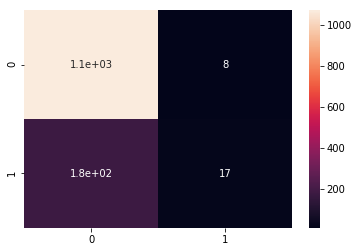

In [660]:
sns.heatmap(cm,annot=True)

In [661]:
cm

array([[1072,    8],
       [ 175,   17]], dtype=int64)

In [662]:
tp=cm[1,1]
tn=cm[0,0]
fp=cm[0,1]
fn=cm[1,0]

In [663]:
acc=(tp+tn)/(tp+tn+fp+fn)
acc*100

85.61320754716981

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9.  Calculate value of kappa for the full model built in question 5. Consider threshold value as 0.18</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [664]:
ypred=model5.predict(x_test)

In [665]:
pred=ypred

In [666]:
pred.head()

3170    0.110731
2232    0.060353
217     0.169873
708     0.069410
887     0.041779
dtype: float64

In [667]:
pred[pred>0.18]=1
pred[pred<0.18]=0
pred.head()


3170    0.0
2232    0.0
217     0.0
708     0.0
887     0.0
dtype: float64

In [668]:
p0=(tp+tn)/(tp+tn+fp+fn)
papos=(tp+fn)/(tp+tn+fp+fn)
pbpos=(tp+fp)/(tp+tn+fp+fn)
pabpos=papos*pbpos
paneg=(tn+fp)/(tp+tn+fp+fn)
pbneg=(tn+fn)/(tp+tn+fp+fn)
pabneg=paneg*pbneg
pe=pabpos+pabneg

In [669]:
kappa=(p0-pe)/1-pe
print("Kappa Score",kappa)

Kappa Score -0.8145395751750326


No Agreement

In [670]:
cm=confusion_matrix(y_test,pred)

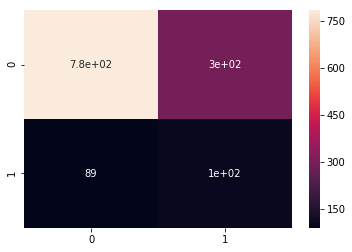

In [671]:
sns.heatmap(cm,annot=True)

In [672]:
cm

array([[784, 296],
       [ 89, 103]], dtype=int64)

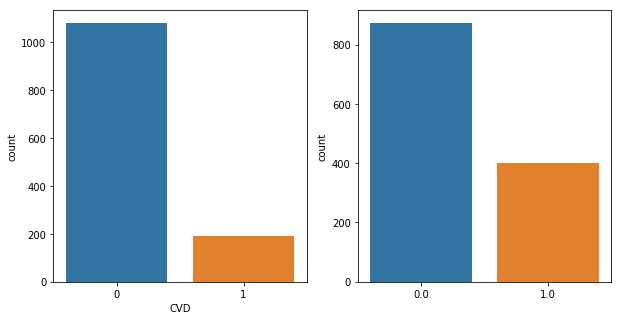

In [673]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(x=y_test)
plt.subplot(1,2,2)
sns.countplot(x=pred)

In [674]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.90      0.73      0.80      1080
          1       0.26      0.54      0.35       192

avg / total       0.80      0.70      0.73      1272



<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Identify the features from the dataset that are involved in multicollinearity. After that, split the updated data using train_test_split.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

### VIF

In [675]:
num_col=df_heart.select_dtypes(include='number')

In [676]:
num_col=num_col.drop(['CVD'],axis=1)

In [677]:
num_col.columns

Index(['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate',
       'glucose'],
      dtype='object')

In [678]:
cat_col=df_heart.select_dtypes(include='object')

In [679]:
cat_col.columns

Index(['male', 'education', 'currentSmoker', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes'],
      dtype='object')

In [680]:
num_col=num_col-num_col.mean()

In [681]:
while(len(num_col.columns)>0):
    vif=pd.DataFrame()
    vif['features']=num_col.columns
    vif['VIF']=[variance_inflation_factor(num_col.values,i) for i in range(num_col.shape[1])]
    vif.set_index(vif['features'],inplace=True)
    vif=vif.drop(['features'],axis=1)
    print(vif)

    if vif['VIF'].max() >5:
        num_col=num_col.drop(vif['VIF'].idxmax(),axis=1)
    else:
        break

print('The Final Features are : ',num_col.columns)   

                 VIF
features            
age         1.336993
cigsPerDay  1.054157
totChol     1.105362
sysBP       3.038843
diaBP       2.775379
BMI         1.178017
heartRate   1.066537
glucose     1.041498
The Final Features are :  Index(['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate',
       'glucose'],
      dtype='object')


In [682]:
X=data[['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate',
       'glucose']]


In [683]:
for col in cat_col:
    X[col]=cat_col[col]

In [684]:
X.head()

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,male,education,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes
0,39,0.0,195.0,106.0,70.0,26.97,80.0,77.0,1,4,0,0,0,0,0
1,46,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0,2,0,0,0,0,0
2,48,20.0,245.0,127.5,80.0,25.34,75.0,70.0,1,1,1,0,0,0,0
3,61,30.0,225.0,150.0,95.0,28.58,65.0,103.0,0,3,1,0,0,1,0
4,46,23.0,285.0,130.0,84.0,23.10,85.0,85.0,0,3,1,0,0,0,0


In [685]:
X['male']=X['male'].astype('int64')
X['education']=X['education'].astype('float64')
X['currentSmoker']=X['currentSmoker'].astype('int64')
X['BPMeds']=X['BPMeds'].astype('float64')
X['prevalentStroke']=X['prevalentStroke'].astype('int64')
X['prevalentHyp']=X['prevalentHyp'].astype('int64')
X['diabetes']=X['diabetes'].astype('int64')

In [686]:
X=sm.add_constant(X)

In [687]:
Y=df_heart['CVD']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=2)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. Use the data obtained from Q10 and identify 5 features that contribute most in the prediction of target variable.<br></b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [688]:
model6=sm.Logit(y_train,x_train).fit()
model6.summary()

Optimization terminated successfully.
         Current function value: 0.378835
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    CVD   No. Observations:                 2968
Model:                          Logit   Df Residuals:                     2952
Method:                           MLE   Df Model:                           15
Date:                Sat, 15 May 2021   Pseudo R-squ.:                  0.1048
Time:                        20:30:24   Log-Likelihood:                -1124.4
converged:                       True   LL-Null:                       -1256.0
                                        LLR p-value:                 2.341e-47
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -7.6803      0.793     -9.686      0.000      -9.234      -6.126
age                 0.0597      0.007      7.983      0.000       0.045       0.074
cigsPerDay          0.0213      0.007      2.993      0.003       0.007       0.035
totChol             0.0010      0.001      0.712      0.476      -0.002       0.004
sysBP               0.0133      0.004      3.222      0.001       0.005       0.021
diaBP              -0.0036      0.007     -0.491      0.623      -0.018       0.011
BMI                 0.0037      0.014      0.259      0.796      -0.024       0.032
heartRate           0.0013      0.005      0.283      0.777      -0.008       0.010
glucose             0.0029      0.002      1.240      0.215      -0.002       0.008
male                0.5611      0.120      4.689      0.000       0.327       0.796
education           0.0447      0.054      0.825      0.409      -0.062       0.151
currentSmoker      -0.0314      0.176     -0.178      0.859      -0.377       0.314
BPMeds              0.1478      0.273      0.542      0.588      -0.387       0.682
prevalentStroke     0.9604      0.574      1.673      0.094      -0.165       2.085
prevalentHyp        0.2671      0.153      1.748      0.080      -0.032       0.567
diabetes            0.8864      0.304      2.913      0.004       0.290       1.483
===================================================================================
"""

In [689]:
pval=model6.pvalues

In [690]:
pval_less=pval[pval<0.5]
pval_less.sort_values(ascending=True)

const              3.459824e-22
age                1.431415e-15
male               2.744682e-06
sysBP              1.271611e-03
cigsPerDay         2.762049e-03
diabetes           3.578800e-03
prevalentHyp       8.049308e-02
prevalentStroke    9.426873e-02
glucose            2.150474e-01
education          4.093672e-01
totChol            4.763204e-01
dtype: float64

'age', 'cigsPerDay', 'sysBP', 'male', 'diabetes' contribute in predicting the target variable

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Build a model using the features obtained in question 11. For the model find: 
                        <ol>                       
                         <li>Accuracy</li>
                        <li>F<sub>1</sub> score</li>
                        </ol>
                        </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [691]:
X=df_heart[['cigsPerDay', 'glucose', 'male', 'prevalentHyp', 'diabetes']]

Y=df_heart['CVD']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=2)

In [692]:
model7=LogisticRegression()
model7.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [693]:
pred=model7.predict(x_test)

In [694]:
accuracy_score(y_test,pred)*100

84.35534591194968

In [695]:
f1_score(y_test,pred)*100

0.9950248756218907

In [696]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.84      1.00      0.92      1074
          1       0.33      0.01      0.01       198

avg / total       0.77      0.84      0.77      1272



<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Compare the full model in question 5 and the model built in question 12 using their ROC curves. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### Rebuilding Model from Question 5

In [697]:
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,CVD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [698]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
male               4240 non-null int64
age                4240 non-null int64
education          4240 non-null float64
currentSmoker      4240 non-null int64
cigsPerDay         4240 non-null float64
BPMeds             4240 non-null float64
prevalentStroke    4240 non-null int64
prevalentHyp       4240 non-null int64
diabetes           4240 non-null int64
totChol            4240 non-null float64
sysBP              4240 non-null float64
diaBP              4240 non-null float64
BMI                4240 non-null float64
heartRate          4240 non-null float64
glucose            4240 non-null float64
CVD                4240 non-null int64
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [699]:
X5=data.drop(['CVD'],axis=1)
Y5=data['CVD']
x_train5,x_test5,y_train5,y_test5=train_test_split(X5,Y5,test_size=0.3,random_state=48)

In [700]:
model_5=LogisticRegression()
model_5.fit(x_train5,y_train5)
pred5=model_5.predict(x_test5)

In [701]:
yprob_5=model_5.predict_proba(x_test5)

In [702]:
yprob_5

array([[0.90380176, 0.09619824],
       [0.9366805 , 0.0633195 ],
       [0.84315804, 0.15684196],
       ...,
       [0.95254618, 0.04745382],
       [0.90290271, 0.09709729],
       [0.74292219, 0.25707781]])

### Rebuilding Model from Question 12

In [703]:
X12=df_heart[['cigsPerDay', 'glucose', 'male', 'prevalentHyp', 'diabetes']]
Y12=df_heart['CVD']
x_train12,x_test12,y_train12,y_test12=train_test_split(X12,Y12,test_size=0.3,random_state=2)

In [704]:
model_12=LogisticRegression()
model_12.fit(x_train12,y_train12)
pred12=model_12.predict(x_test12)

In [705]:
yprob_12=model_12.predict_proba(x_test12)

In [706]:
yprob5=yprob_5[:,1]

In [707]:
yprob12=yprob_12[:,1]

In [708]:
tpr5,fpr5,th5=roc_curve(y_test5,yprob5)
auc_score5=roc_auc_score(y_test5,yprob5)
tpr12,fpr12,th12=roc_curve(y_test12,yprob12)
auc_score12=roc_auc_score(y_test12,yprob12)

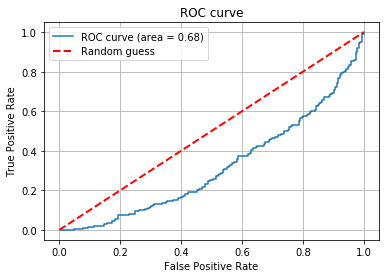

In [709]:

plt.plot(fpr5, tpr5, label='ROC curve (area = %.2f)' %auc_score5)
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random guess')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.legend()
plt.show()


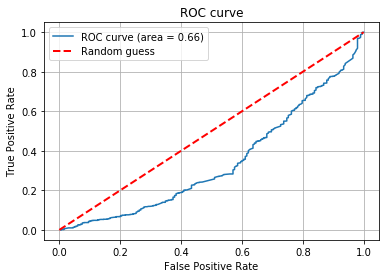

In [710]:
plt.plot(fpr12, tpr12, label='ROC curve (area = %.2f)' %auc_score12)
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random guess')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.legend()
plt.show()

Both the models are underperforming

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Build a logistic regression model using information about heart rate of the patients. Compute the AUC score.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [711]:
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,CVD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [712]:
df_HR=data[['heartRate','CVD']]
df_HR.head()

,heartRate,CVD
0,80.0,0
1,95.0,0
2,75.0,0
3,65.0,1
4,85.0,0


In [713]:
X=df_HR.drop(['CVD'],axis=1)
Y=df_HR['CVD']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [714]:
model8=LogisticRegression()
model8.fit(x_train,y_train)
pred=model8.predict(x_test)

In [715]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.85      1.00      0.92      1085
          1       0.00      0.00      0.00       187

avg / total       0.73      0.85      0.79      1272



[[1085    0]
 [ 187    0]]


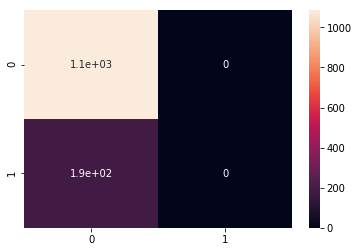

In [716]:
cm=confusion_matrix(y_test,pred)
print(cm)
sns.heatmap(cm,annot=True)

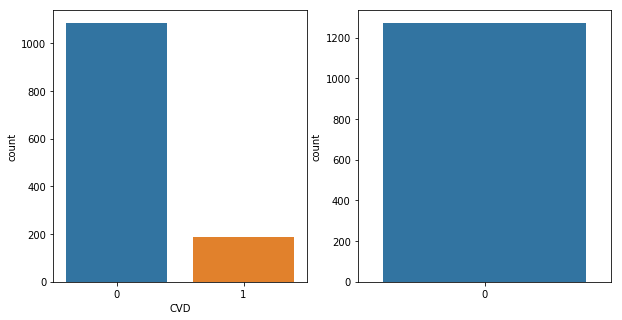

In [717]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(x=y_test)
plt.subplot(1,2,2)
sns.countplot(x=pred)

In [718]:
yprob=model8.predict_proba(x_test)

In [719]:
auc_score=roc_auc_score(y_test,yprob[:,1])
print(auc_score)

0.48906330860790065


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Calculate the cross entropy for the model built in question 14.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [720]:
log_loss(y_test, pred)

5.077634580069416

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. Compare the model built in question 14 to the full model built in question 5.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [721]:
fpr8,tpr8,th8=roc_curve(y_test,yprob[:,1])

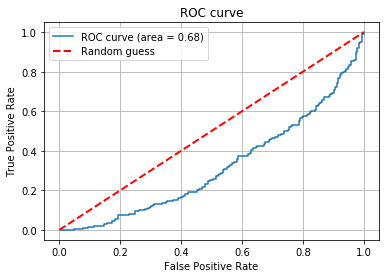

In [722]:

plt.plot(fpr5, tpr5, label='ROC curve (area = %.2f)' %auc_score5)
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random guess')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.legend()
plt.show()


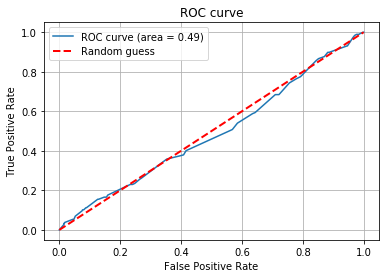

In [723]:

plt.plot(fpr8, tpr8, label='ROC curve (area = %.2f)' %auc_score)
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random guess')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.legend()
plt.show()


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. What is the cross entropy for the full model? Use the full model in Q5.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [724]:
log_loss(y_test5, pred5)

5.023331470947821

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Predict whether a patient has cardiovascular disease based on smoking habits of the patient. For the model find the following:<br> <ol type = "a">
                        <li> Precision </li>
                        <li> Recall</li>   
                        <li> F<sub>1</sub> score </li>
                        </ol>
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [725]:
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,CVD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [726]:
df_sm=data[['currentSmoker','CVD']]

In [727]:
df_sm.head()

,currentSmoker,CVD
0,0,0
1,0,0
2,1,0
3,1,1
4,1,0


In [728]:
X=df_sm.drop(['CVD'],axis=1)
Y=df_sm['CVD']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [729]:
model9=LogisticRegression()
model.fit(x_train,y_train)
pred=model.predict(x_test)

In [730]:
print(precision_score(y_test,pred))

0.0


In [731]:
print(recall_score(y_test,pred))

0.0


In [732]:
print(f1_score(y_test,pred))

0.0


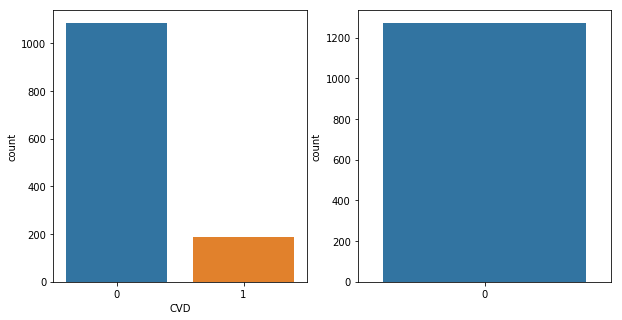

In [733]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(x=y_test)
plt.subplot(1,2,2)
sns.countplot(x=pred)

<a id="opt"> </a>
## 4. Determining optimal threshold

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Obtain the optimal value threshold for the full model using the Youden's index.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [734]:
res1=pd.DataFrame({'Threshold':th5,'FPR':fpr5,'TPR':tpr5,'TPR-FPR':tpr5-fpr5})
res1.sort_values('TPR-FPR',ascending=False).head()

,Threshold,FPR,TPR,TPR-FPR
296,0.023590,1.000000,1.000000,0.000000
294,0.029120,0.994792,0.993519,-0.001273
0,0.756209,0.005208,0.000000,-0.005208
295,0.028840,1.000000,0.993519,-0.006481
2,0.611624,0.036458,0.000926,-0.035532


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Consider the costs of false negatives and false positives as 3 and 1.3 respectively to obtain the optimal cut-off probability for which the total cost will be minimum.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [735]:
#tot_cost=cfp*FP+cfn*FN
tot_cost=[]
cfp=1.3
cfn=3
for i in th5:
    ypred_th=np.zeros([len(y_test5),1])
    ypred_th[yprob5>i]=1
    fp=confusion_matrix(y_test5,ypred_th)[0,1]
    fn=confusion_matrix(y_test5,ypred_th)[1,0]
    tot_cost.append(cfp*fp+cfn*fn)

In [736]:
res_cost=pd.DataFrame()
res_cost['Threshold']=th5
res_cost['Total_Cost']=tot_cost
res_cost.sort_values('Total_Cost').head()


,Threshold,Total_Cost
23,0.410118,524.9
20,0.418570,525.7
22,0.413474,526.6
21,0.415701,527.0
19,0.419477,528.7


# Model with Optimal Threshold

In [809]:
X=data.drop(['CVD'],axis=1)
X=sm.add_constant(X)
Y=data['CVD']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=2)

In [810]:
fin_model=sm.Logit(y_train,x_train).fit()
fin_model.summary()

Optimization terminated successfully.
         Current function value: 0.378835
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    CVD   No. Observations:                 2968
Model:                          Logit   Df Residuals:                     2952
Method:                           MLE   Df Model:                           15
Date:                Sat, 15 May 2021   Pseudo R-squ.:                  0.1048
Time:                        20:49:44   Log-Likelihood:                -1124.4
converged:                       True   LL-Null:                       -1256.0
                                        LLR p-value:                 2.341e-47
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -7.6803      0.793     -9.686      0.000      -9.234      -6.126
male                0.5611      0.120      4.689      0.000       0.327       0.796
age                 0.0597      0.007      7.983      0.000       0.045       0.074
education           0.0447      0.054      0.825      0.409      -0.062       0.151
currentSmoker      -0.0314      0.176     -0.178      0.859      -0.377       0.314
cigsPerDay          0.0213      0.007      2.993      0.003       0.007       0.035
BPMeds              0.1478      0.273      0.542      0.588      -0.387       0.682
prevalentStroke     0.9604      0.574      1.673      0.094      -0.165       2.085
prevalentHyp        0.2671      0.153      1.748      0.080      -0.032       0.567
diabetes            0.8864      0.304      2.913      0.004       0.290       1.483
totChol             0.0010      0.001      0.712      0.476      -0.002       0.004
sysBP               0.0133      0.004      3.222      0.001       0.005       0.021
diaBP              -0.0036      0.007     -0.491      0.623      -0.018       0.011
BMI                 0.0037      0.014      0.259      0.796      -0.024       0.032
heartRate           0.0013      0.005      0.283      0.777      -0.008       0.010
glucose             0.0029      0.002      1.240      0.215      -0.002       0.008
===================================================================================
"""

In [811]:
pred=fin_model.predict(x_test)

In [812]:
tpr,fpr,th=roc_curve(y_test,pred)

In [813]:
res1=pd.DataFrame({'Threshold':th5,'FPR':fpr5,'TPR':tpr5,'TPR-FPR':tpr5-fpr5})
res1.sort_values('TPR-FPR',ascending=False).head()

,Threshold,FPR,TPR,TPR-FPR
296,0.023590,1.000000,1.000000,0.000000
294,0.029120,0.994792,0.993519,-0.001273
0,0.756209,0.005208,0.000000,-0.005208
295,0.028840,1.000000,0.993519,-0.006481
2,0.611624,0.036458,0.000926,-0.035532


In [814]:
acc=[]
rec=[]
pre=[]
f1=[]
for i in th:
    ypred_th=np.zeros([len(y_test),1])
    ypred_th[pred>i]=1
    acc.append(accuracy_score(y_test,ypred_th))
    rec.append(recall_score(y_test,ypred_th))
    pre.append(precision_score(y_test,ypred_th))
    f1.append(f1_score(y_test,ypred_th))

In [816]:
res=pd.DataFrame()
res['Threshold']=th
res['Accuracy']=acc
res['Recall']=rec
res['Precision']=pre
res['F1_score']=f1
res.sort_values('F1_score',ascending=False).head()

,Threshold,Accuracy,Recall,Precision,F1_score
155,0.195761,0.745283,0.570707,0.321023,0.410909
159,0.192356,0.740566,0.580808,0.317680,0.410714
145,0.204774,0.756289,0.545455,0.329268,0.410646
156,0.195643,0.744497,0.570707,0.320113,0.410163
160,0.191155,0.739780,0.580808,0.316804,0.409982


In [817]:
pred[pred>0.195761]=1
pred[pred<0.195761]=0
pred.head()


2183    1.0
732     0.0
3668    0.0
3651    0.0
2137    0.0
dtype: float64

[[834 240]
 [ 85 113]]


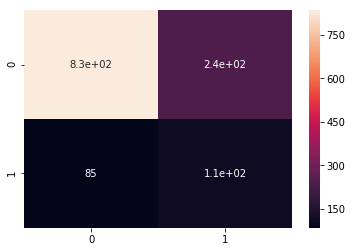

In [818]:
cm=confusion_matrix(y_test,pred)
print(cm)
sns.heatmap(cm,annot=True)

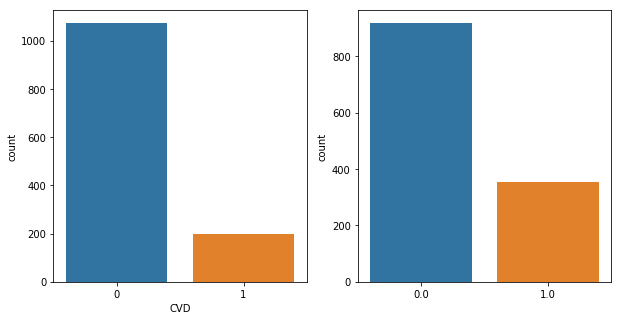

In [819]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(x=y_test)
plt.subplot(1,2,2)
sns.countplot(x=pred)